In [1]:
import os
import sys
import pandas as pd
sys.path.append(os.path.abspath('../Scripts'))
import warnings
warnings.filterwarnings('ignore')
import ipaddress

In [2]:
import Eda as ed

SyntaxError: source code string cannot contain null bytes (<string>)

In [3]:
df = 'C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/Fraud_Data.csv'
ecommerce_df = ed.load_data(df)

2024-10-29 08:49:43,097 - INFO - Attempting to load data from C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/Fraud_Data.csv
2024-10-29 08:49:44,283 - INFO - Successfully loaded data from C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/Fraud_Data.csv


In [4]:
ecommerce_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [5]:
ecommerce_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [6]:
ed.data_overview(ecommerce_df)

2024-10-29 08:49:44,644 - INFO - Checking categorical values...
2024-10-29 08:49:44,716 - INFO - Unique values in 'signup_time': ['2015-02-24 22:55:49' '2015-06-07 20:39:50' '2015-01-01 18:52:44' ...
 '2015-03-03 23:07:31' '2015-07-09 20:06:07' '2015-06-10 07:02:20']
2024-10-29 08:49:44,901 - INFO - Value counts for 'signup_time':
signup_time
2015-02-24 22:55:49    1
2015-03-29 18:25:39    1
2015-07-17 17:19:15    1
2015-03-30 03:33:20    1
2015-05-28 09:37:05    1
                      ..
2015-04-02 06:55:03    1
2015-04-15 10:48:29    1
2015-07-27 03:45:16    1
2015-07-16 21:04:30    1
2015-06-10 07:02:20    1
Name: count, Length: 151112, dtype: int64
2024-10-29 08:49:44,952 - INFO - Unique values in 'purchase_time': ['2015-04-18 02:47:11' '2015-06-08 01:38:54' '2015-01-01 18:52:45' ...
 '2015-05-20 07:07:47' '2015-09-07 09:34:46' '2015-07-21 02:03:53']
2024-10-29 08:49:45,147 - INFO - Value counts for 'purchase_time':
purchase_time
2015-06-08 09:42:04    3
2015-07-17 23:22:55    3
2

In [7]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
ed.clean_data(ecommerce_df)

2024-10-29 08:49:45,675 - INFO - Starting data cleaning process...
2024-10-29 08:49:45,677 - INFO - Initial data shape: (151112, 11)
2024-10-29 08:49:45,678 - INFO - Checking for missing values...
2024-10-29 08:49:45,735 - INFO - Missing values in each column:
Series([], dtype: int64)
2024-10-29 08:49:45,744 - INFO - Checking for duplicates...
2024-10-29 08:49:46,047 - INFO - Removed duplicates: 0 rows removed.


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [9]:
creditcard = 'C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/creditcard.csv'
creditcard = ed.load_data(creditcard)

2024-10-29 08:49:46,091 - INFO - Attempting to load data from C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/creditcard.csv
2024-10-29 08:49:49,822 - INFO - Successfully loaded data from C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/creditcard.csv


In [10]:
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
df = 'C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/IpAddress_to_Country.csv'
ip_country_df = ed.load_data(df)

2024-10-29 08:49:50,039 - INFO - Attempting to load data from C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/IpAddress_to_Country.csv
2024-10-29 08:49:50,167 - INFO - Successfully loaded data from C:/Users/BEZA/Desktop/week8/Fraud-Detection/Data/IpAddress_to_Country.csv


In [12]:
ip_country_df

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [13]:
ip_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [14]:
ed.clean_data(ip_country_df)

2024-10-29 08:49:50,466 - INFO - Starting data cleaning process...
2024-10-29 08:49:50,468 - INFO - Initial data shape: (138846, 3)
2024-10-29 08:49:50,469 - INFO - Checking for missing values...
2024-10-29 08:49:50,482 - INFO - Missing values in each column:
Series([], dtype: int64)
2024-10-29 08:49:50,486 - INFO - Checking for duplicates...
2024-10-29 08:49:50,555 - INFO - Removed duplicates: 0 rows removed.


,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [15]:
ecommerce_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [16]:
ip_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [17]:

# Convert IP addresses to integer format
ecommerce_df, ip_country_df = ed.convert_ip_to_integer(ecommerce_df, ip_country_df)
# Merge the datasets
merged_data = ed.merge_datasets(ecommerce_df, ip_country_df)

# Save the results
output_filepath = 'merged_ecommerce_data.csv'
ed.save_results(merged_data, output_filepath)

# Display the first few rows of the merged data
print(merged_data.head())


2024-10-29 08:49:50,902 - INFO - Convert IP addresses to integer format for both datasets...
2024-10-29 08:49:50,911 - INFO - Merge eCommerce data with IP country data based on IP ranges...
     user_id          signup_time        purchase_time  purchase_value  \
634   247547  2015-06-28 03:00:34  2015-08-09 03:57:29              47   
635   220737  2015-01-28 14:21:11  2015-02-11 20:28:28              15   
636   390400  2015-03-19 20:49:09  2015-04-11 23:41:23              44   
637    69592  2015-02-24 06:11:57  2015-05-23 16:40:14              55   
638   174987  2015-07-07 12:58:11  2015-11-03 04:04:30              51   

         device_id  source browser sex  age  ip_address  class  \
634  KIXYSVCHIPQBR     SEO  Safari   F   30    16778864      0   
635  PKYOWQKWGJNJI     SEO  Chrome   F   34    16842045      0   
636  LVCSXLISZHVUO     Ads      IE   M   29    16843656      0   
637  UHAUHNXXUADJE  Direct  Chrome   F   30    16938732      0   
638  XPGPMOHIDRMGE     SEO  Chrome 

In [18]:
ecommerce_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708,0


In [19]:
merged_data = 'merged_ecommerce_data.csv'
merged_data = ed.load_data(merged_data)

2024-10-29 08:49:53,522 - INFO - Attempting to load data from merged_ecommerce_data.csv
2024-10-29 08:49:54,897 - INFO - Successfully loaded data from merged_ecommerce_data.csv


In [20]:
merged_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,1.677824e+07,1.677926e+07,Australia
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,1.680998e+07,1.684275e+07,Thailand
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,1.684326e+07,1.684378e+07,China
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,1.692467e+07,1.694106e+07,China
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,1.694106e+07,1.697382e+07,Thailand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129141,33024,2015-04-12 21:07:04,2015-05-12 22:42:35,56,PRYMTRKRYXEZC,Direct,Opera,F,18,3757992063,0,3.757965e+09,3.758031e+09,China
129142,62132,2015-08-07 10:46:59,2015-08-27 22:35:23,36,XAZBVQEIGZMVM,Direct,Chrome,F,36,3758008198,0,3.757965e+09,3.758031e+09,China
129143,363333,2015-02-09 07:56:12,2015-03-19 16:55:29,37,LPFTNUDBBWDVD,SEO,FireFox,M,42,3758018545,0,3.757965e+09,3.758031e+09,China
129144,340800,2015-05-10 19:31:22,2015-05-15 09:27:33,9,VUDMWVCEHXMCV,Direct,Chrome,F,37,3758029146,0,3.757965e+09,3.758031e+09,China


In [21]:
ed.clean_data(merged_data)

2024-10-29 08:49:55,334 - INFO - Starting data cleaning process...
2024-10-29 08:49:55,336 - INFO - Initial data shape: (129146, 14)
2024-10-29 08:49:55,339 - INFO - Checking for missing values...
2024-10-29 08:49:55,595 - INFO - Missing values in each column:
Series([], dtype: int64)
2024-10-29 08:49:55,609 - INFO - Checking for duplicates...
2024-10-29 08:49:56,832 - INFO - Removed duplicates: 0 rows removed.


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,lower_bound_ip_address,upper_bound_ip_address,country
0,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,16778864,0,1.677824e+07,1.677926e+07,Australia
1,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,16842045,0,1.680998e+07,1.684275e+07,Thailand
2,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,16843656,0,1.684326e+07,1.684378e+07,China
3,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,16938732,0,1.692467e+07,1.694106e+07,China
4,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,16971984,0,1.694106e+07,1.697382e+07,Thailand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129141,33024,2015-04-12 21:07:04,2015-05-12 22:42:35,56,PRYMTRKRYXEZC,Direct,Opera,F,18,3757992063,0,3.757965e+09,3.758031e+09,China
129142,62132,2015-08-07 10:46:59,2015-08-27 22:35:23,36,XAZBVQEIGZMVM,Direct,Chrome,F,36,3758008198,0,3.757965e+09,3.758031e+09,China
129143,363333,2015-02-09 07:56:12,2015-03-19 16:55:29,37,LPFTNUDBBWDVD,SEO,FireFox,M,42,3758018545,0,3.757965e+09,3.758031e+09,China
129144,340800,2015-05-10 19:31:22,2015-05-15 09:27:33,9,VUDMWVCEHXMCV,Direct,Chrome,F,37,3758029146,0,3.757965e+09,3.758031e+09,China


In [22]:
ed.data_overview(merged_data)

2024-10-29 08:49:57,010 - INFO - Checking categorical values...
2024-10-29 08:49:57,148 - INFO - Unique values in 'signup_time': ['2015-06-28 03:00:34' '2015-01-28 14:21:11' '2015-03-19 20:49:09' ...
 '2015-02-09 07:56:12' '2015-05-10 19:31:22' '2015-01-31 03:06:13']
2024-10-29 08:49:57,523 - INFO - Value counts for 'signup_time':
signup_time
2015-06-28 03:00:34    1
2015-04-09 01:26:33    1
2015-08-06 21:15:07    1
2015-07-11 08:08:58    1
2015-07-08 03:47:29    1
                      ..
2015-05-09 19:58:01    1
2015-04-25 22:06:36    1
2015-02-24 12:29:03    1
2015-03-28 19:44:08    1
2015-01-31 03:06:13    1
Name: count, Length: 129146, dtype: int64
2024-10-29 08:49:57,605 - INFO - Unique values in 'purchase_time': ['2015-08-09 03:57:29' '2015-02-11 20:28:28' '2015-04-11 23:41:23' ...
 '2015-03-19 16:55:29' '2015-05-15 09:27:33' '2015-05-23 11:23:39']
2024-10-29 08:49:57,866 - INFO - Value counts for 'purchase_time':
purchase_time
2015-06-08 09:42:04    3
2015-09-10 09:04:53    3
2

on the above I have executed cleaning(check for missing and duplicate datas), correct data type and also Merge Datasets for Geolocation Analysis

### Univariate analysis that affect the fraudulent cases

In [23]:
 # Calculate class distribution
class_distribution, fraud_percentage = ed.calculate_class_distribution(merged_data)
print(class_distribution)
print(f"Fraudulent Transactions Percentage: {fraud_percentage[1]:.2f}%")
print(f"Non-Fraudulent Transactions Percentage: {fraud_percentage[0]:.2f}%")

2024-10-29 08:49:58,254 - INFO - Calculate the distribution of the 'class' column.
class
0    116878
1     12268
Name: count, dtype: int64
Fraudulent Transactions Percentage: 9.50%
Non-Fraudulent Transactions Percentage: 90.50%


2024-10-29 08:49:58,397 - INFO - Plotting class distribution...
2024-10-29 08:49:58,410 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-10-29 08:49:58,414 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-10-29 08:49:58,461 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-10-29 08:49:58,463 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\BEZA\\Desktop\\week8\\Fraud-Detection\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-10-29 08:49:58,464 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\BEZA\\Desktop\\week8\\Fraud-Detection\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='norma

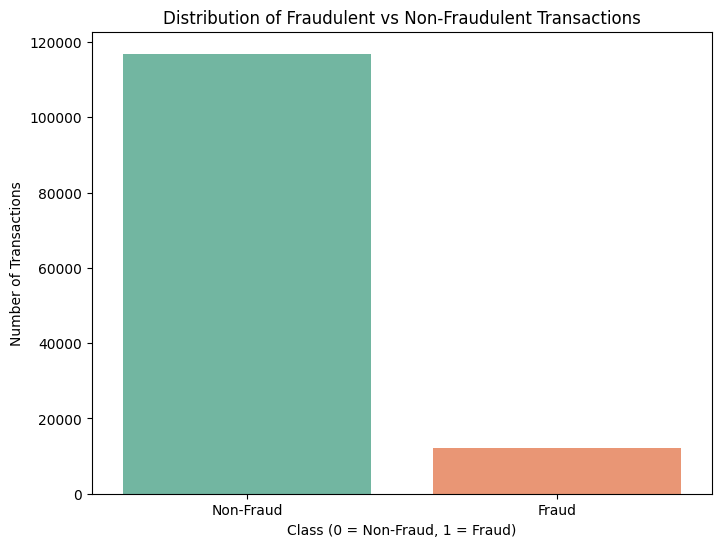

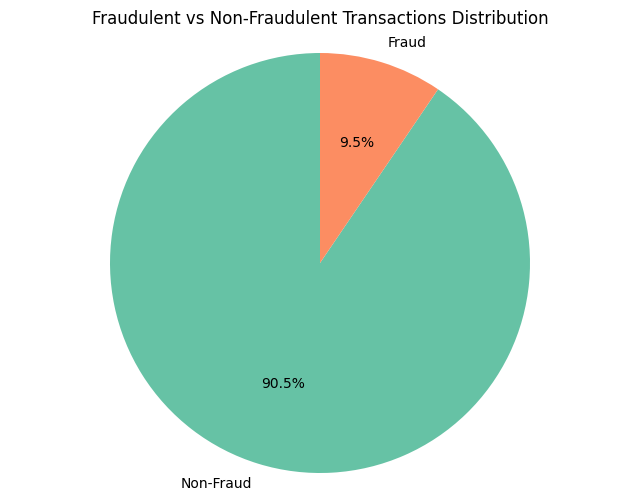

In [24]:
ed.plot_class_distribution(merged_data, class_distribution)

In [25]:
ed.calculate_source_distribution(merged_data) 

2024-10-29 08:50:00,875 - INFO - Calculating source distribution...
2024-10-29 08:50:00,895 - INFO - Source distribution calculated: {'SEO': 51960, 'Ads': 51067, 'Direct': 26119}


(source
 SEO       51960
 Ads       51067
 Direct    26119
 Name: count, dtype: int64,
 source
 SEO       40.233534
 Ads       39.542069
 Direct    20.224397
 Name: count, dtype: float64)

In [26]:
 # Calculate source distribution
source_distribution, source_percentage = ed.calculate_source_distribution(merged_data)
print(source_distribution)

2024-10-29 08:50:01,060 - INFO - Calculating source distribution...
2024-10-29 08:50:01,080 - INFO - Source distribution calculated: {'SEO': 51960, 'Ads': 51067, 'Direct': 26119}
source
SEO       51960
Ads       51067
Direct    26119
Name: count, dtype: int64


2024-10-29 08:50:01,171 - INFO - Plotting source distribution...


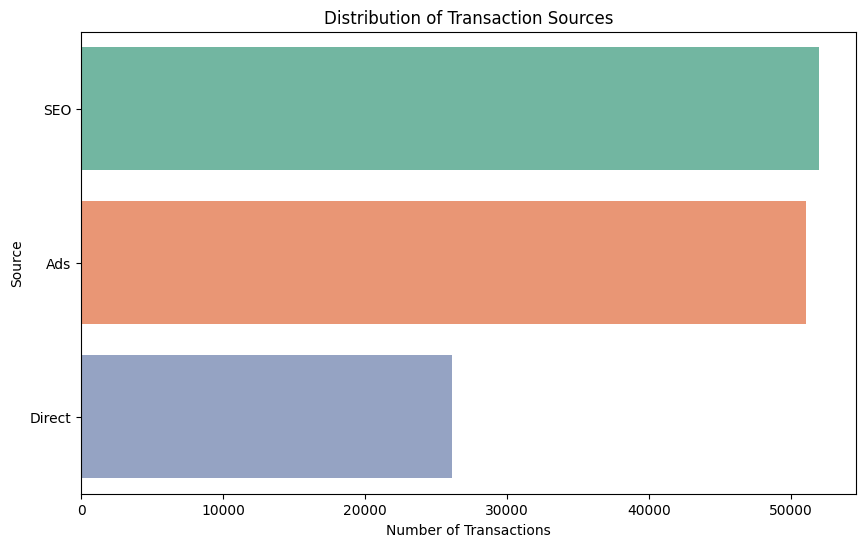

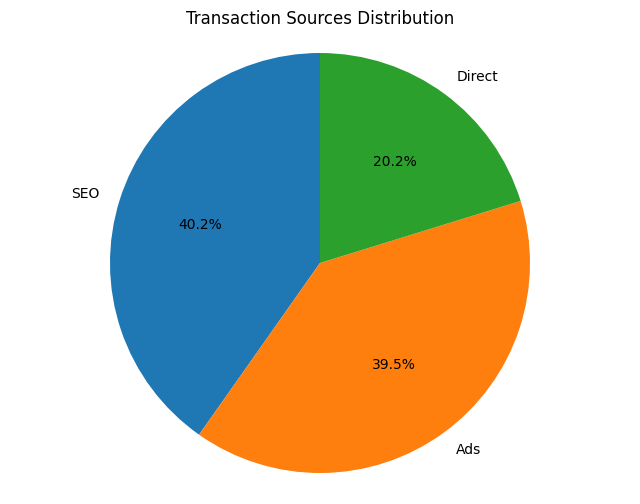

2024-10-29 08:50:01,538 - INFO - Source distribution plotted successfully.


In [27]:
ed.plot_source_distribution(source_distribution)

In [28]:
sex_distribution, sex_percentage = ed.calculate_sex_distribution(merged_data)

2024-10-29 08:50:01,556 - INFO - Calculating sex distribution...
2024-10-29 08:50:01,573 - INFO - Sex distribution calculated: {'M': 75441, 'F': 53705}


2024-10-29 08:50:01,750 - INFO - Plotting sex distribution...


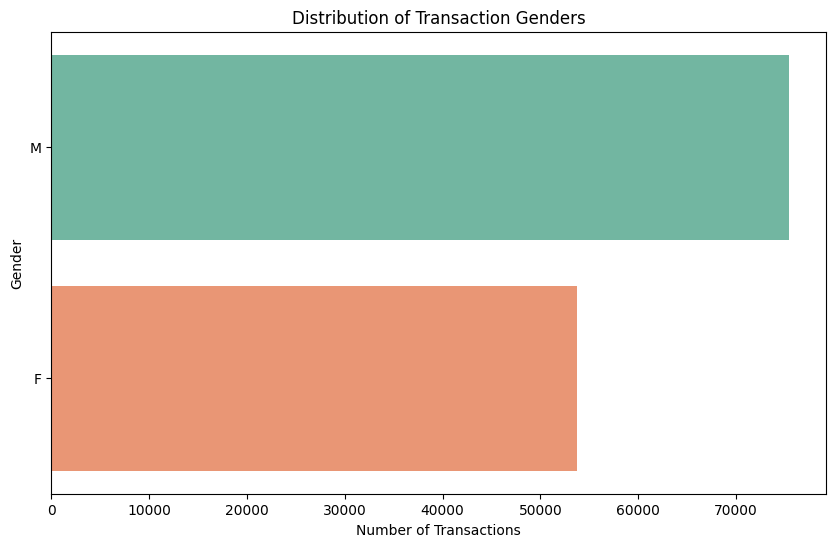

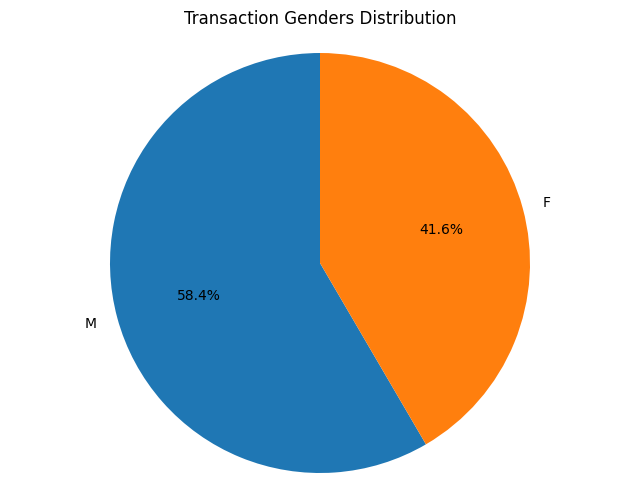

2024-10-29 08:50:02,310 - INFO - Sex distribution plotted successfully.


In [29]:
ed.plot_sex_distribution(sex_distribution)

In [30]:
ed.calculate_age_statistics(merged_data)

2024-10-29 08:50:02,327 - INFO - Calculating age statistics...
2024-10-29 08:50:02,346 - INFO - Age statistics calculated: Mean=33.13, Median=33.00, Std Dev=8.62


mean       33.128413
median     33.000000
std_dev     8.615297
dtype: float64

2024-10-29 08:50:02,490 - INFO - Plotting age distribution...


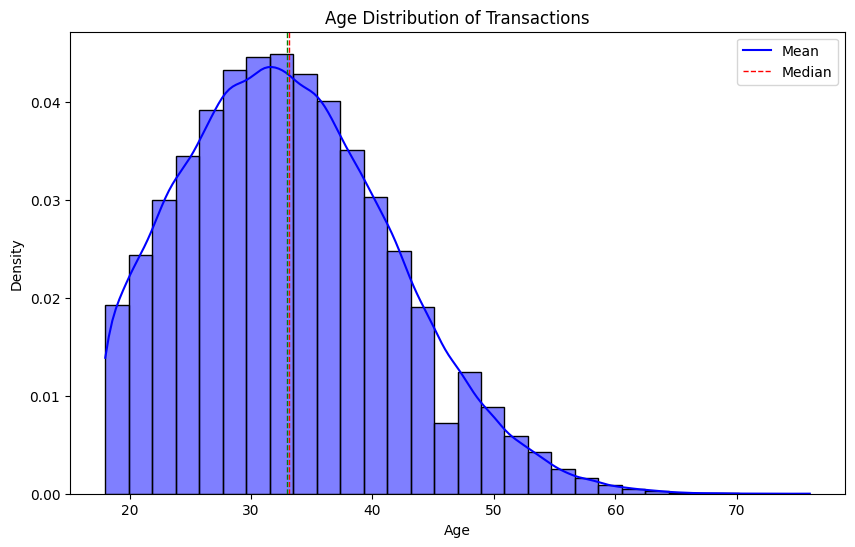

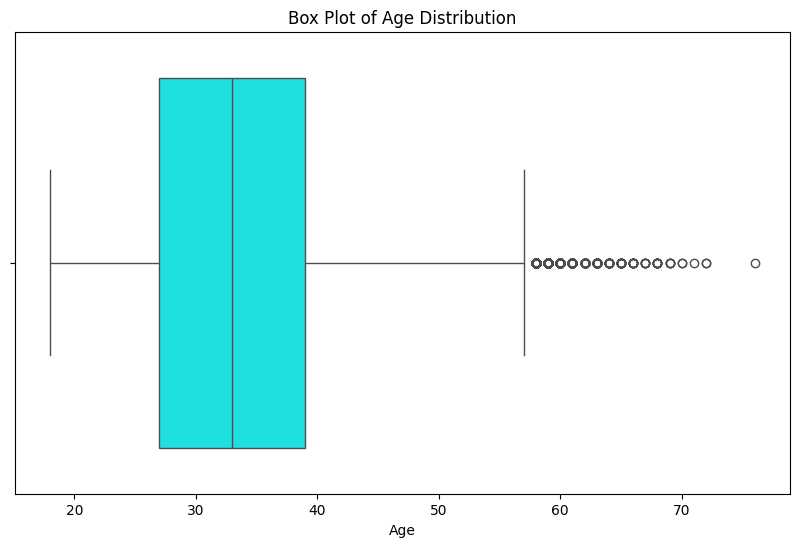

2024-10-29 08:50:04,920 - INFO - Age distribution plotted successfully.


In [31]:
ed.plot_age_distribution(merged_data)

here we have enough information to know the catagorical data overview in general before going through the fraudulent behaviour of each catagories

so the next is bivariate analysis 

2024-10-29 08:50:04,935 - INFO - Analyzing fraudulent transactions by source...
2024-10-29 08:50:04,980 - INFO - Fraud rates by source:
class  source  fraud_rate
0         Ads    0.093975
1      Direct    0.103564
2         SEO    0.091686


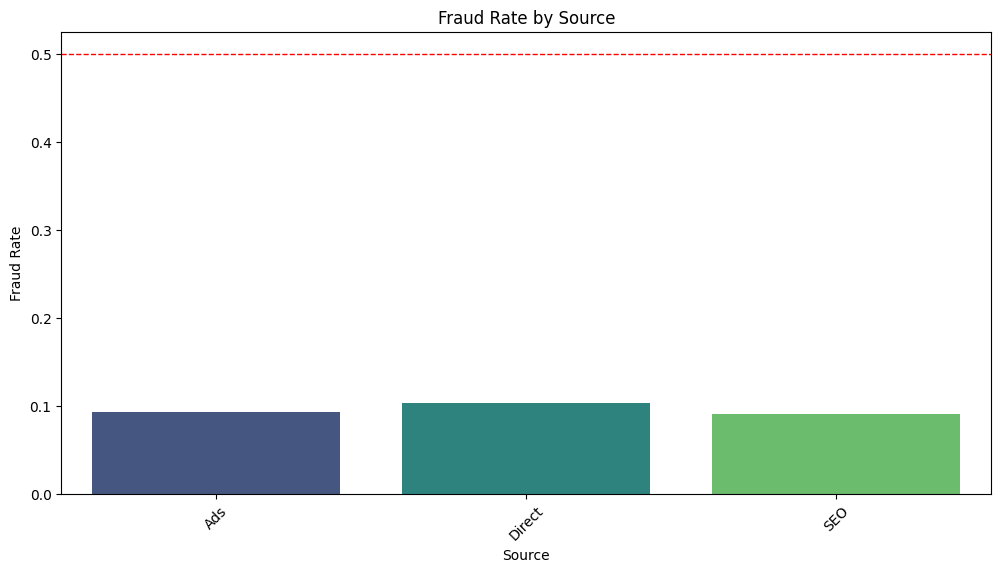

2024-10-29 08:50:05,342 - INFO - Bivariate analysis by source completed successfully.


In [32]:
ed.analyze_fraud_by_source(merged_data)

here is clearly shown the sources of the e-commerce transaction occured almost the same fraud rate so from our historical data the previously transactions were not depend on the varience of sources used by the user.

2024-10-29 08:50:05,360 - INFO - Analyzing fraudulent transactions by sex...
2024-10-29 08:50:05,403 - INFO - Fraud rates by sex:
class sex  fraud_rate
0       F    0.092282
1       M    0.096923


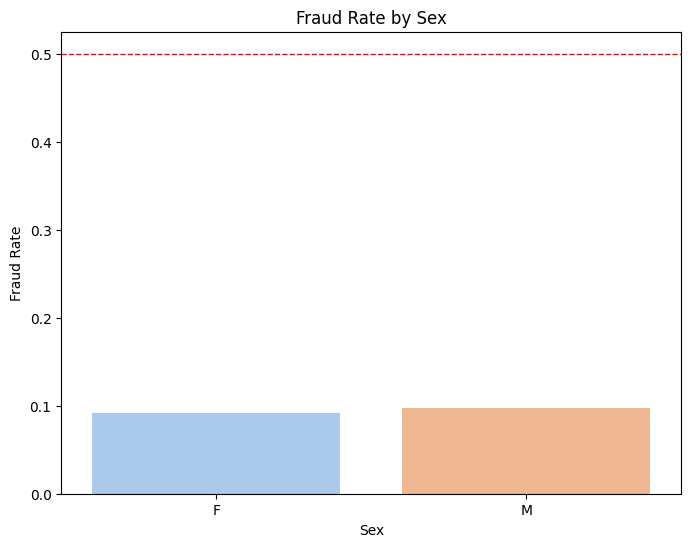

2024-10-29 08:50:05,686 - INFO - Bivariate analysis by sex completed successfully.


In [33]:
ed.analyze_fraud_by_sex(merged_data)

here also there is no significant difference in fraud rate for female and male so we can say that the fraudulent rate is not depend on whether the user is female or male

2024-10-29 08:50:05,701 - INFO - Analyzing fraudulent transactions by age range...
2024-10-29 08:50:05,755 - INFO - Fraud rates by age range:
class age_range  fraud_rate
0          1-10         NaN
1         11-20    0.086929
2         21-30    0.092336
3         31-40    0.097302
4         41-50    0.092784
5         51-60    0.111417
6         61-70    0.124638
7         71-80    0.000000
8         81-90         NaN
9        91-100         NaN


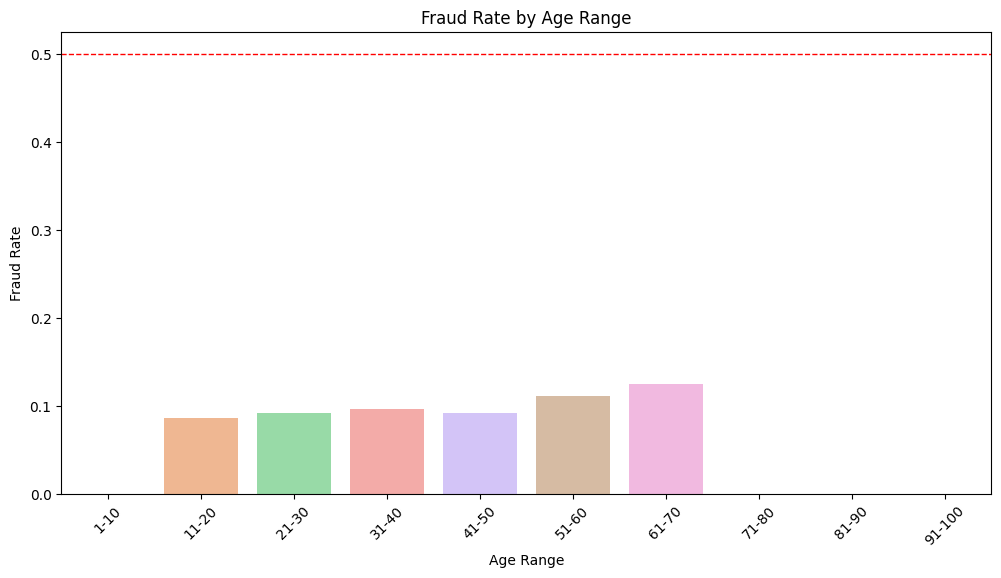

2024-10-29 08:50:06,225 - INFO - Bivariate analysis by age range completed successfully.


In [34]:
ed.analyze_fraud_by_age_range(merged_data)

In [35]:
country_fraud_stats = ed.calculate_fraud_by_country(merged_data)
top_countries = ed.top_fraudulent_countries(country_fraud_stats)
print(top_countries)

2024-10-29 08:50:06,243 - INFO - Calculating fraud by country...
2024-10-29 08:50:06,276 - INFO - Fraud calculation by country completed.
2024-10-29 08:50:06,278 - INFO - Extracting top 10 countries with highest fraud rates...
2024-10-29 08:50:06,282 - INFO - Top fraudulent countries extraction completed.
                   country  total_transactions  total_fraud  fraud_rate
166           Turkmenistan                   1            1    1.000000
115                Namibia                  23           10    0.434783
154              Sri Lanka                  31           13    0.419355
98              Luxembourg                  72           28    0.388889
177  Virgin Islands (U.S.)                   3            1    0.333333
51                 Ecuador                 106           28    0.264151
164                Tunisia                 118           31    0.262712
131                   Peru                 119           31    0.260504
20                 Bolivia                  5

In [36]:
import geopandas as gpd

In [37]:
world = gpd.read_file("copy_4.shp")

In [38]:
print(world.columns)


Index(['featurecla', 'NAME_LONG', 'cartodb _2', 'geometry'], dtype='object')


2024-10-29 08:50:06,865 - INFO - Plotting fraud distribution on world map...
2024-10-29 08:50:08,071 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x000001DC821CDD30>
2024-10-29 08:50:08,595 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=16.0.
2024-10-29 08:50:08,596 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\BEZA\\Desktop\\week8\\Fraud-Detection\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-10-29 08:50:08,598 - DEBUG - findfont: score(FontEntry(fname='c:\\Users\\BEZA\\Desktop\\week8\\Fraud-Detection\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSansMono-BoldOblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
2024-10-29 08:50:08,598 - DEBUG - find

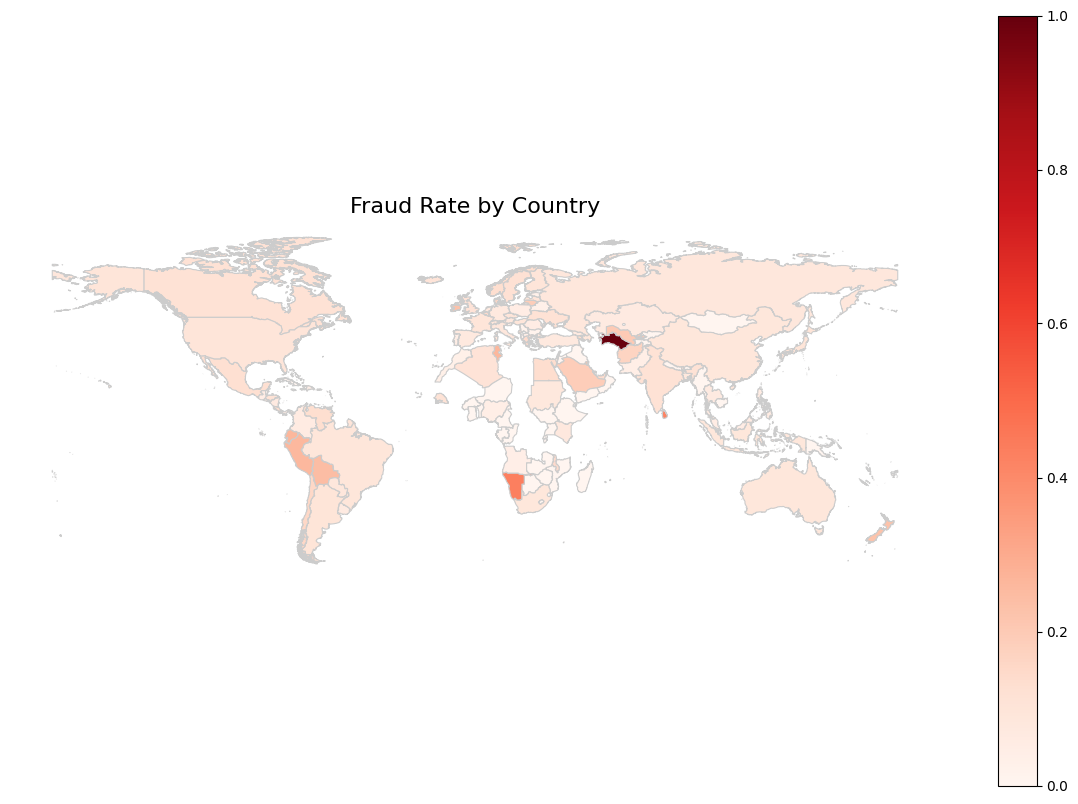

2024-10-29 08:50:09,734 - INFO - Fraud map plotted successfully.


In [39]:
ed.plot_fraud_map(country_fraud_stats, 'copy_4.shp')

## Credit card analysis

Now lets look at credit card fraud status from the historical data

In [40]:
# Replace 'class' column name with 'stage'
creditcard = creditcard.rename(columns={'Class': 'class'})


In [41]:
 # Calculate class distribution
class_distribution, fraud_percentage = ed.calculate_class_distribution(creditcard)
print(class_distribution)
print(f"Fraudulent Transactions Percentage: {fraud_percentage[1]:.2f}%")
print(f"Non-Fraudulent Transactions Percentage: {fraud_percentage[0]:.2f}%")

2024-10-29 08:50:09,976 - INFO - Calculate the distribution of the 'class' column.
class
0    284315
1       492
Name: count, dtype: int64
Fraudulent Transactions Percentage: 0.17%
Non-Fraudulent Transactions Percentage: 99.83%


2024-10-29 08:50:10,112 - INFO - Plotting class distribution...
2024-10-29 08:50:10,562 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-29 08:50:10,870 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


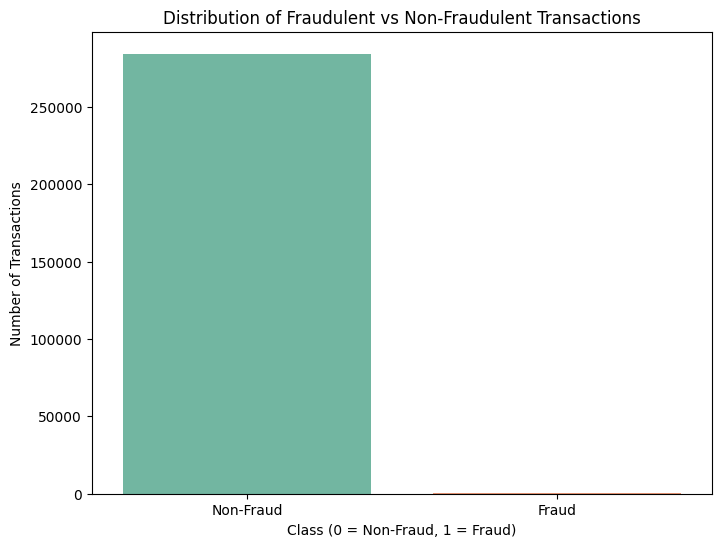

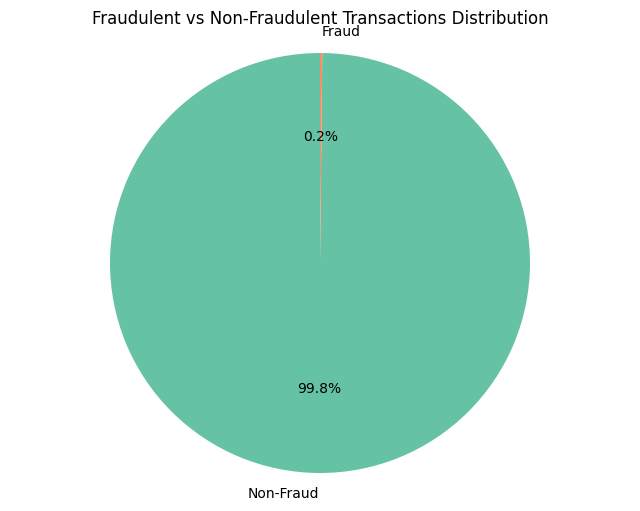

In [42]:
ed.plot_class_distribution(creditcard, class_distribution)

2024-10-29 08:50:11,717 - INFO - Starting combined fraud analysis...
2024-10-29 08:50:11,723 - INFO - eCommerce Fraud Rate: 0.09
2024-10-29 08:50:11,726 - INFO - Credit Card Fraud Rate: 0.00


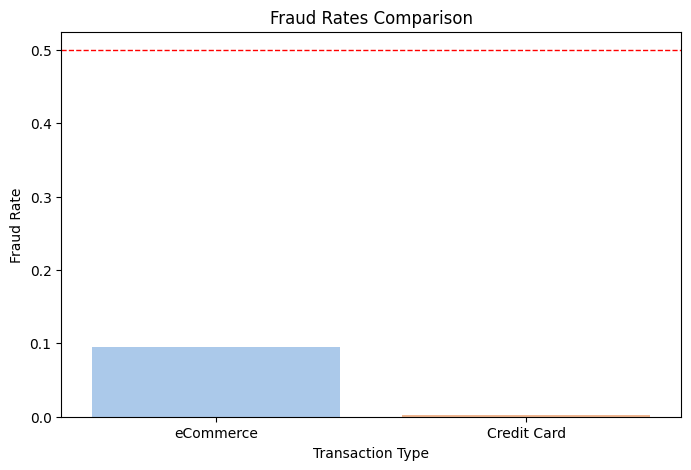

2024-10-29 08:50:11,997 - INFO - Combined fraud analysis completed.


In [43]:
ed.analyze_combined_fraud(merged_data, creditcard)

here we can see the fraudulent case is almost none and we can say the credit card is better compared to the ecommerece, so it a good point to focus on the ecommerce system in the process of fraud detection